# Task4 - Breast Cancer Prediction with Logistic Regression

We will train a Logistic Regression model on the **Breast Cancer Wisconsin dataset**.  
The dataset contains measurements of cell nuclei, and the target (`diagnosis`) indicates whether a tumor is **benign (0)** or **malignant (1)**.  

## **Steps**:  
1. Import libraries  
2. Load and explore the dataset  
3. Data cleaning and preprocessing  
4. Train/test split  
5. Logistic regression model training  
6. Model evaluation (accuracy, precision, recall, F1, confusion matrix, ROC-AUC)  
7. Threshold tuning  
8. Sigmoid function explanation  

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_score, recall_score
)

import os
os.makedirs("outputs", exist_ok=True)

# 2. Loading the dataset

In [4]:
df = pd.read_csv("data.csv")
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
df.head()

Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Exploring the Dataset

In [5]:
print(df.info())
print(df.describe().T.head())

# Save summary statistics
df.describe().to_csv("outputs/summary_statistics.csv")
print("Saved summary statistics to outputs/summary_statistics.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 4. Visualizing Missing Values

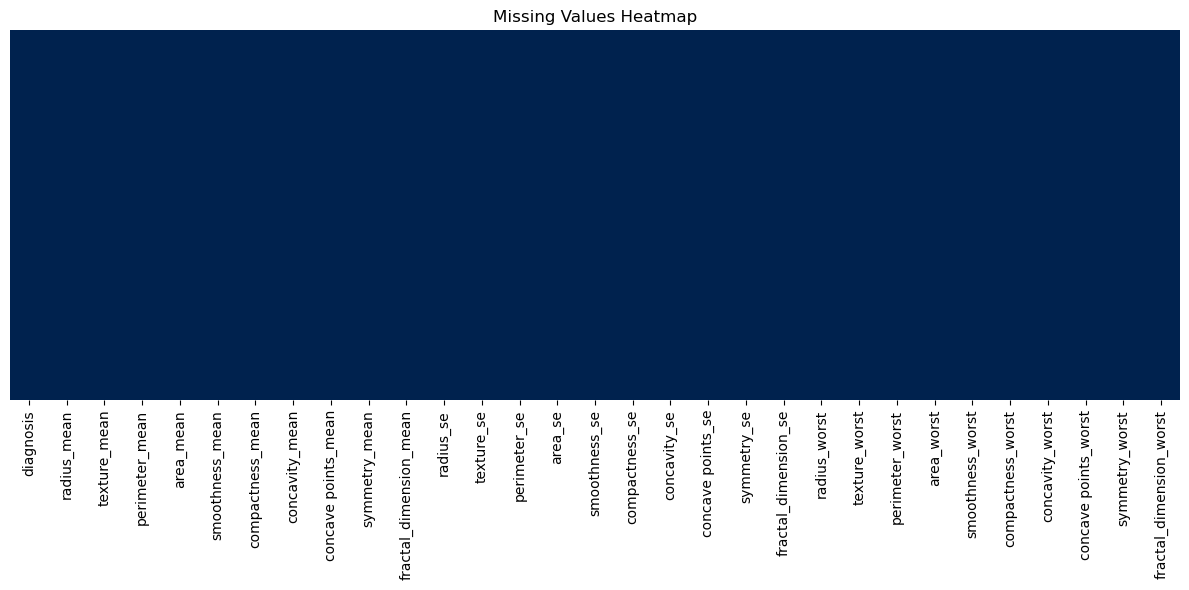

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.savefig("outputs/missing_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

# 5. Data Cleaning

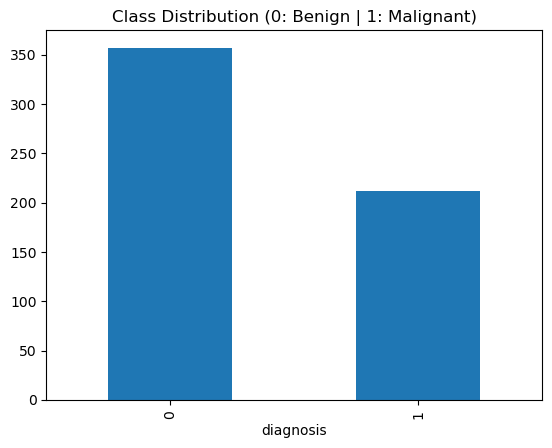

diagnosis
0    357
1    212
Name: count, dtype: int64


In [6]:
# Droping useless columns
drop_cols = ["id", "Unnamed: 32"]
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

# Encode target: Malignant (M)=1, Benign (B)=0
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0}).astype('category')

# Class distribution
plot = df['diagnosis'].value_counts().plot(
    kind='bar',
    title="Class Distribution (0: Benign | 1: Malignant)"
)
fig = plot.get_figure()
fig.savefig("outputs/class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print(df['diagnosis'].value_counts())

# 6. Defining Features and Target

In [12]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


# 7. Normalizing Features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).to_csv("outputs/scaled_features.csv", index=False)
print("Saved scaled features to outputs/scaled_features.csv")

Saved scaled features to outputs/scaled_features.csv


# 8. Train-Test Split
```
Spiting the data for Training and Testing
```

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (398, 30) (398,)
Test set: (171, 30) (171,)


# 9. Training Logistic Regression

In [15]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# 10. Evaluating Accuracy & Report

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

pd.DataFrame(report).transpose().to_csv("outputs/classification_report.csv")
print("Saved classification report to outputs/classification_report.csv")

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Saved classification report to outputs/classification_report.csv


# 11. Confusion Matrix

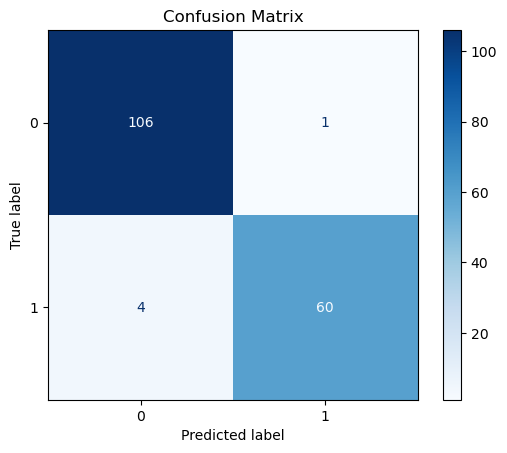

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("outputs/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# 12. ROC Curve & AUC

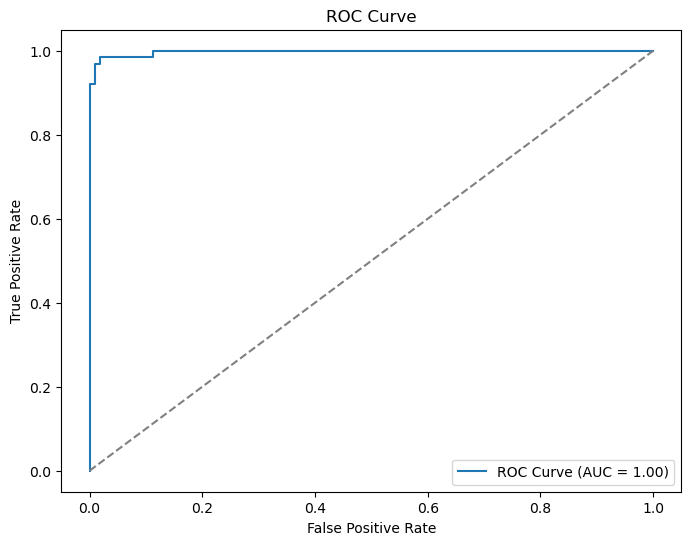

ROC-AUC Score: 1.00


In [18]:
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"ROC-AUC Score: {auc_score:.2f}")

# 13. Threshold Tuning

In [19]:
for threshold in [0.3, 0.5, 0.7]:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"Threshold={threshold:.1f} -> Precision={precision:.2f}, Recall={recall:.2f}")

Threshold=0.3 -> Precision=0.98, Recall=0.97
Threshold=0.5 -> Precision=0.98, Recall=0.94
Threshold=0.7 -> Precision=1.00, Recall=0.92


# 14. Sigmoid Function 

## Logistic Regression and the Sigmoid Function

Logistic regression estimates the probability that a given input belongs to the positive class.

- Formula:  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]

- Where \( z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n \).

- The sigmoid squashes any real number into the range [0,1].  

- Default threshold = 0.5:
  - If σ(z) ≥ 0.5 → Predict Malignant (1)  
  - If σ(z) < 0.5 → Predict Benign (0)  

By lowering the threshold (e.g., 0.3), we increase **recall** (catching more malignant cases),  
while raising the threshold (e.g., 0.7) increases **precision** (fewer false positives).  